In [3]:
import json
preds = json.load(open("../preds_text.json", "r"))
preds_binary = json.load(open("../preds_text_binary.json", "r"))

In [4]:
import numpy as np
binary_preds_from_confidence = np.argmax(np.array(preds['pred']), axis=1).tolist()
assert binary_preds_from_confidence == preds_binary["pred"]

In [8]:
import evaluate
f1 = evaluate.load("f1")
acc = evaluate.load("accuracy")
{**f1.compute(predictions=preds_binary["pred"], references=preds["label"], average="macro"), **acc.compute(predictions=preds_binary["pred"], references=preds["label"])}

{'f1': 0.7512506006056339, 'accuracy': 0.7582723044849522}

In [17]:
from scipy.special import softmax
auc = evaluate.load("roc_auc")
logits = softmax(preds["pred"], axis=1)[:,1]
auc.compute(prediction_scores=logits, references=preds["label"])

{'roc_auc': 0.8319044946878901}

In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(preds["label"], logits)
roc_auc = auc(fpr, tpr)
fpr, tpr, threshold, roc_auc

(array([0.        , 0.        , 0.        , ..., 0.99466435, 0.99466435,
        1.        ]),
 array([0.00000000e+00, 9.39143501e-05, 1.17392938e-02, ...,
        9.99906086e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99725731e+00, 9.97257309e-01, 9.57489570e-01, ...,
        4.23093252e-03, 4.20679973e-03, 1.91590777e-03]),
 0.8319045005145653)

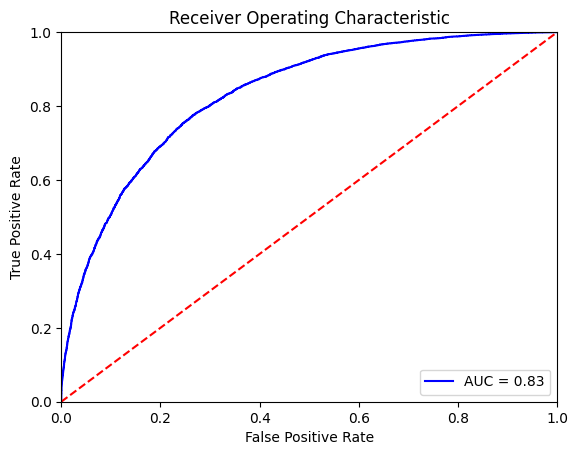

In [23]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()